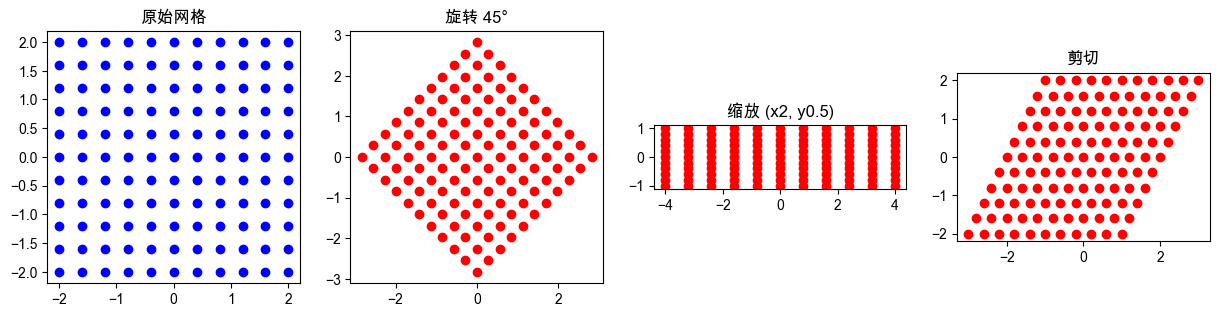

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams['font.family'] = 'Arial Unicode MS' 

# 定义原始网格
x = np.linspace(-2, 2, 11)
y = np.linspace(-2, 2, 11)
X, Y = np.meshgrid(x, y)
points = np.vstack([X.flatten(), Y.flatten()])

# 定义不同的线性变换矩阵
transforms = {
    "旋转 45°": np.array([[np.cos(np.pi/4), -np.sin(np.pi/4)],
                       [np.sin(np.pi/4),  np.cos(np.pi/4)]]),
    "缩放 (x2, y0.5)": np.array([[2, 0],
                               [0, 0.5]]),
    "剪切": np.array([[1, 0.5],
                      [0, 1]])
}

# 绘制原始与变换后的网格
fig, axes = plt.subplots(1, len(transforms)+1, figsize=(15,5))
axes[0].scatter(points[0], points[1], c='blue')
axes[0].set_title("原始网格")
axes[0].set_aspect('equal')

for ax, (name, T) in zip(axes[1:], transforms.items()):
    transformed = T @ points
    ax.scatter(transformed[0], transformed[1], c='red')
    ax.set_title(name)
    ax.set_aspect('equal')

plt.show()


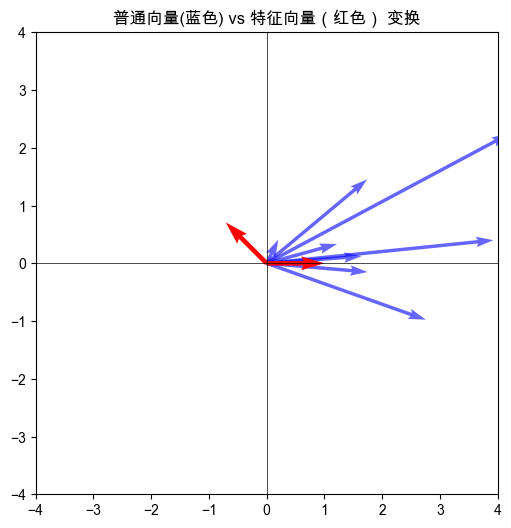

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# 定义矩阵（比如缩放+剪切）
A = np.array([[2, 1],
              [0, 1]])

# 特征分解
eigvals, eigvecs = np.linalg.eig(A)

# 原始向量集合（随机几条）
np.random.seed(0)
vectors = np.random.randn(8, 2)

# 绘制动画
fig, ax = plt.subplots(figsize=(6,6))
ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.set_aspect('equal')
ax.set_title("普通向量(蓝色) vs 特征向量（红色） 变换")

quivers = ax.quiver([0]*len(vectors), [0]*len(vectors),
                    vectors[:,0], vectors[:,1],
                    color='blue', angles='xy', scale_units='xy', scale=1, alpha=0.6)

# 特征向量
eig_quiver = ax.quiver([0]*len(eigvecs.T), [0]*len(eigvecs.T),
                       eigvecs[0,:], eigvecs[1,:],
                       color='red', angles='xy', scale_units='xy', scale=1, width=0.01)

def update(frame):
    global vectors
    transformed = (np.linalg.matrix_power(A, frame+1) @ vectors.T).T
    quivers.set_UVC(transformed[:,0], transformed[:,1])
    return quivers,

ani = animation.FuncAnimation(fig, update, frames=10, interval=800, blit=False)

# 保存为gif（需要安装 Pillow）
ani.save('linear_transform.gif', writer='pillow', fps=1)

HTML(ani.to_jshtml())


奇异值分解 (SVD) 详细分析
原始矩阵 A (3x2):
[[3. 1.]
 [1. 3.]
 [1. 1.]]
矩阵形状: (3, 2)

SVD 分解结果: A = U @ S @ V^T

U 矩阵 ((3, 3)):
[[-6.66666667e-01  7.07106781e-01 -2.35702260e-01]
 [-6.66666667e-01 -7.07106781e-01 -2.35702260e-01]
 [-3.33333333e-01  5.92577380e-18  9.42809042e-01]]

U 的性质:
- U^T @ U = 
[[ 1.00000000e+00  3.97442027e-16 -4.23298126e-18]
 [ 3.97442027e-16  1.00000000e+00  5.22962323e-17]
 [-4.23298126e-18  5.22962323e-17  1.00000000e+00]]
- det(U) = 1.000000

奇异值 σ:
[4.24264069 2.        ]

Σ 矩阵 ((3, 2)):
[[4.24264069 0.        ]
 [0.         2.        ]
 [0.         0.        ]]

V^T 矩阵 ((2, 2)):
[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]

V 矩阵 ((2, 2)):
[[-0.70710678  0.70710678]
 [-0.70710678 -0.70710678]]

V 的性质:
- V^T @ V = 
[[ 1.00000000e+00 -1.01465364e-17]
 [-1.01465364e-17  1.00000000e+00]]
- det(V) = 1.000000

重构验证:
原矩阵 A:
[[3. 1.]
 [1. 3.]
 [1. 1.]]
重构矩阵 U @ S @ V^T:
[[3. 1.]
 [1. 3.]
 [1. 1.]]
重构误差 (Frobenius范数): 0.0000000000

SVD 逐步计算过程
步骤1: 计算 A^T @ A
A^T @ A

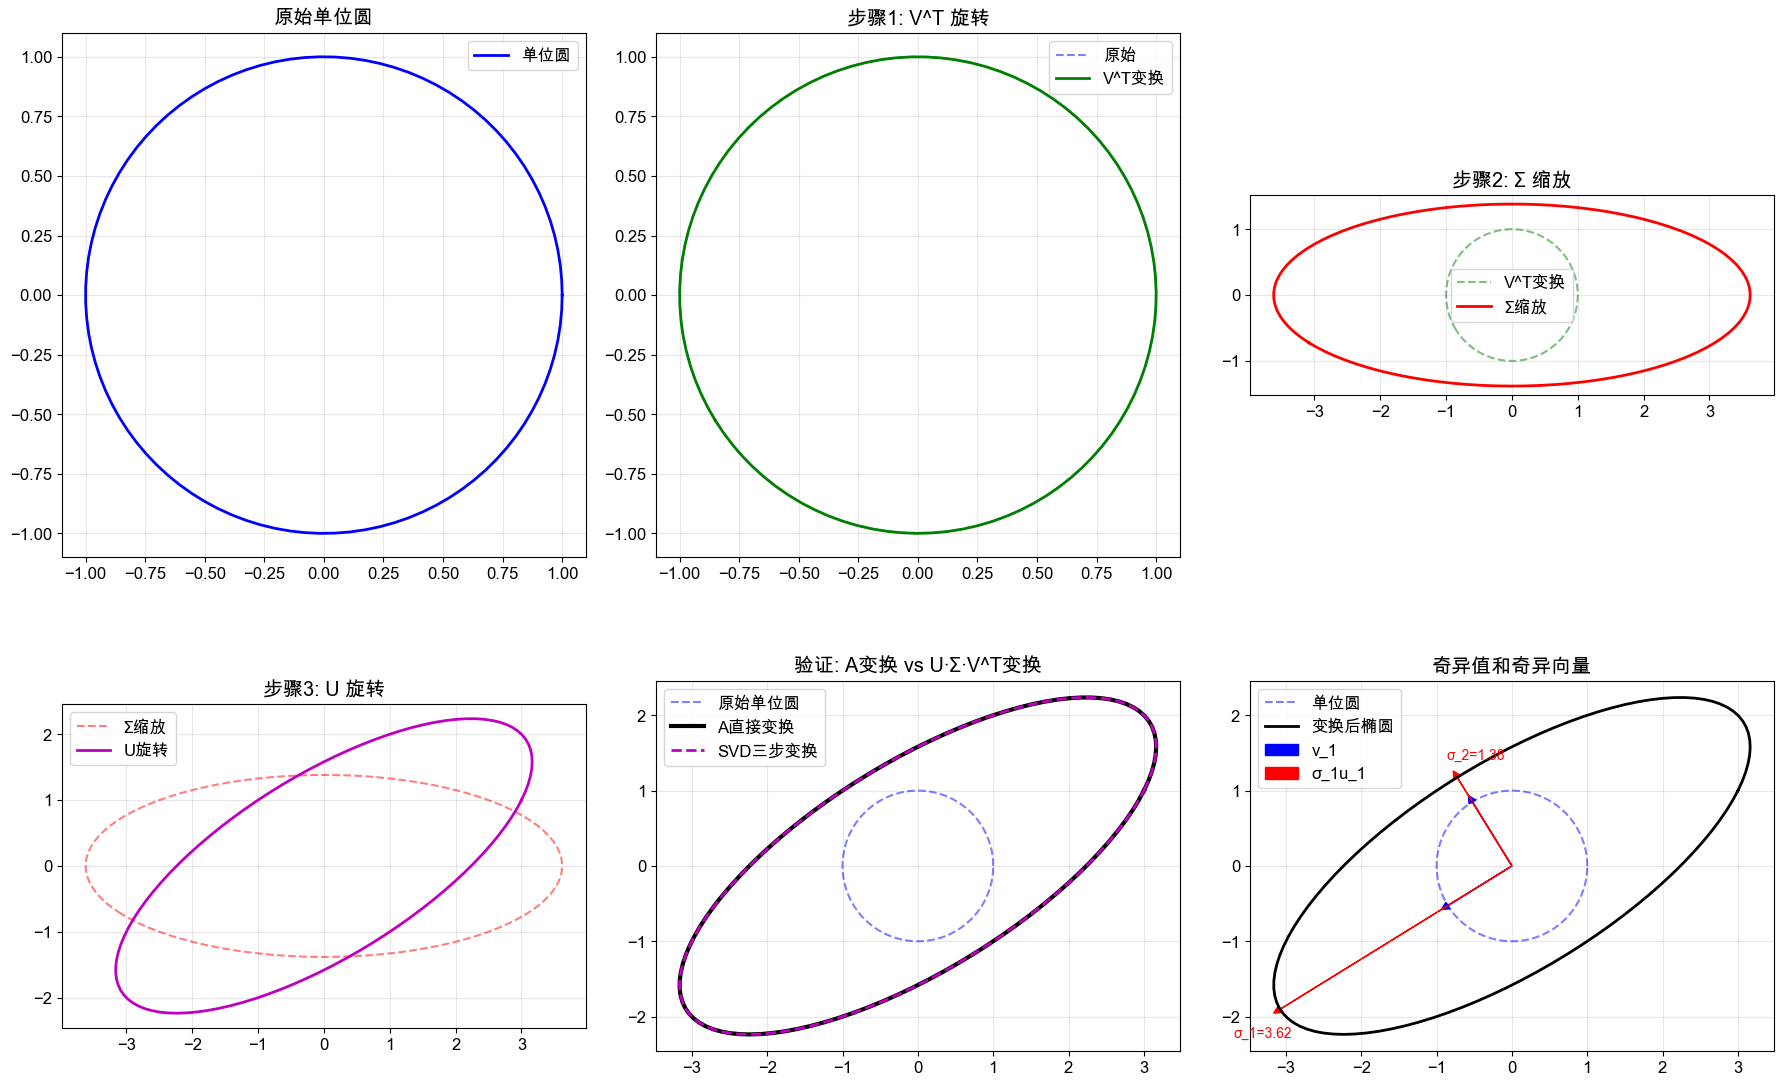


几何变换分析:
矩阵 A = 
[[3 1]
 [1 2]]
奇异值: σ₁=3.618, σ₂=1.382
条件数: κ(A) = σ_max/σ_min = 2.618

SVD 应用: 矩阵秩和低秩近似


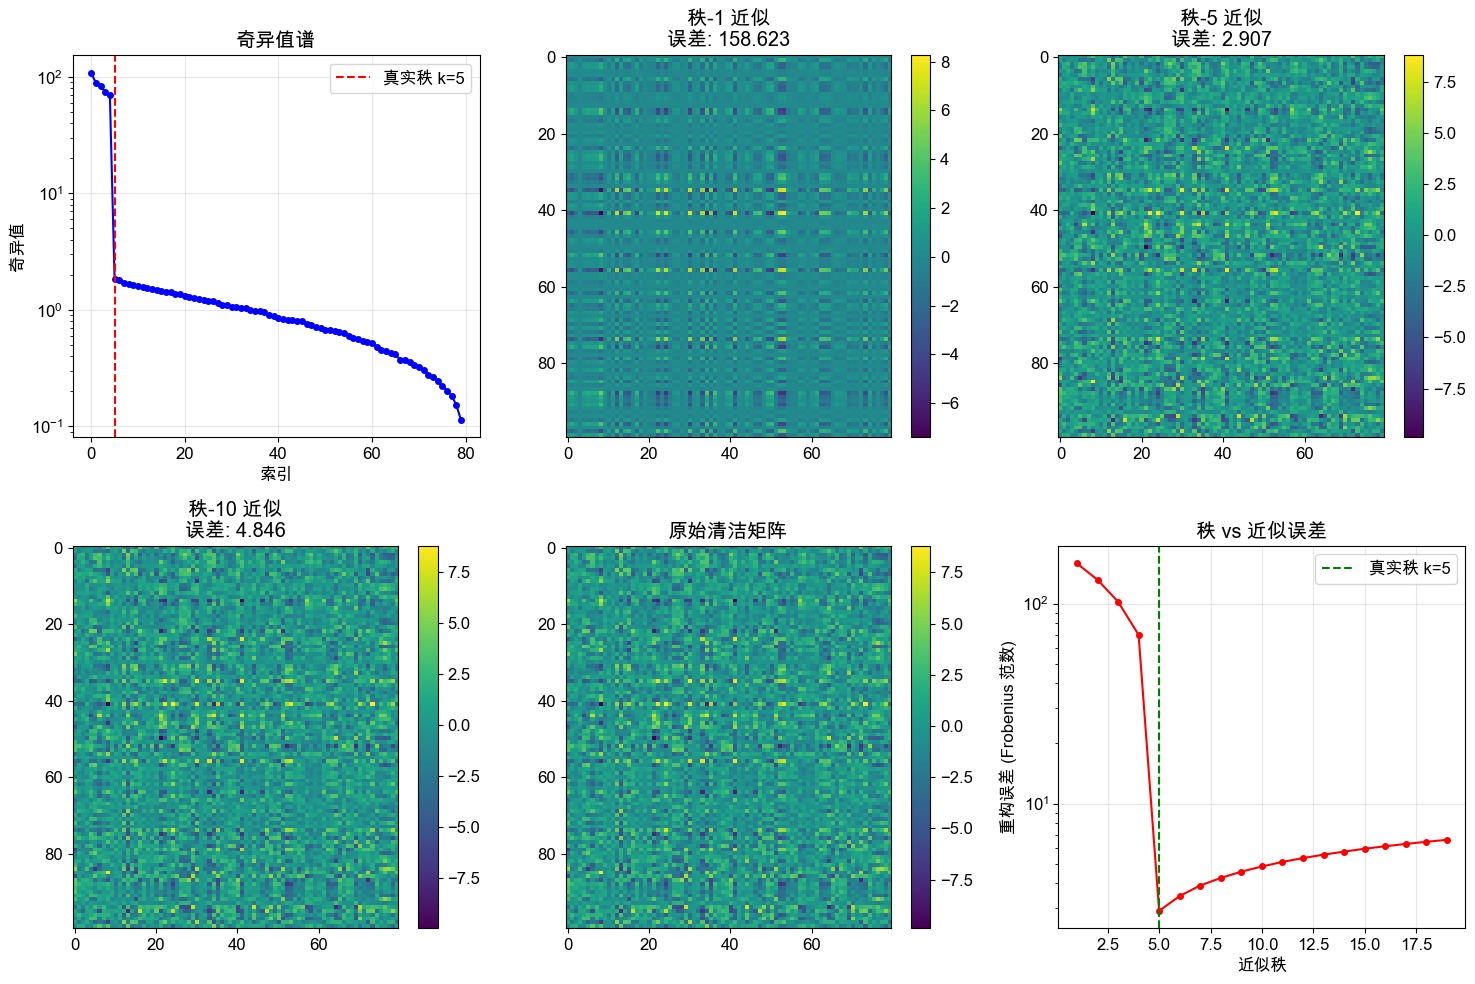

原始矩阵形状: (100, 80)
矩阵的数值秩 (阈值=1e-10): 80
有效秩 (阈值=0.01): 80
前5个奇异值: [108.35329032  88.70402993  82.73627633  74.7208655   69.74177222]

交互式 SVD 分析


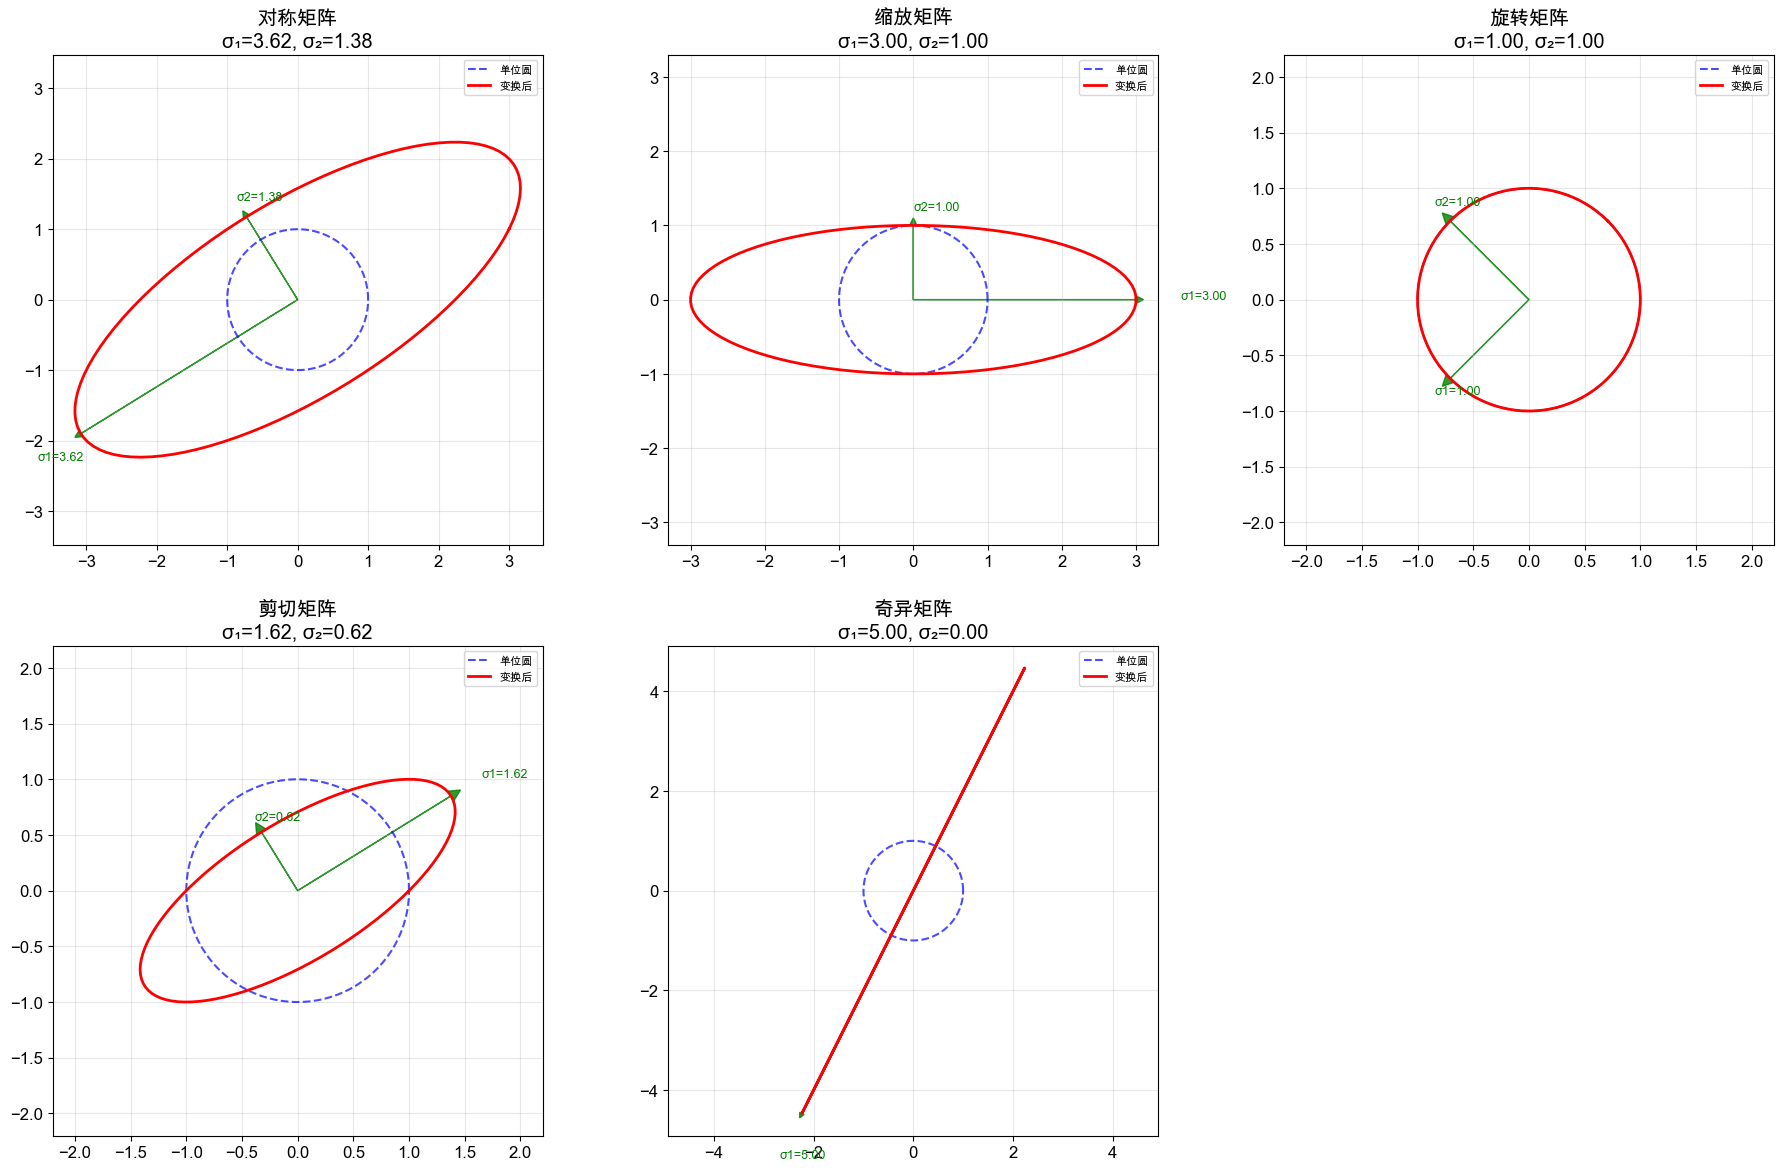


对称矩阵:
  矩阵: 
[[3 1]
 [1 2]]
  奇异值: [3.61803399 1.38196601]
  条件数: 2.62
  数值秩: 2

缩放矩阵:
  矩阵: 
[[3 0]
 [0 1]]
  奇异值: [3. 1.]
  条件数: 3.00
  数值秩: 2

旋转矩阵:
  矩阵: 
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
  奇异值: [1. 1.]
  条件数: 1.00
  数值秩: 2

剪切矩阵:
  矩阵: 
[[1 1]
 [0 1]]
  奇异值: [1.61803399 0.61803399]
  条件数: 2.62
  数值秩: 2

奇异矩阵:
  矩阵: 
[[1 2]
 [2 4]]
  奇异值: [5.00000000e+00 1.04061363e-16]
  条件数: inf
  数值秩: 1

SVD 教程完成!

关键要点:
1. SVD 将任何矩阵分解为 A = U·Σ·V^T
2. U 和 V 是正交矩阵，Σ 是对角矩阵
3. 奇异值反映了矩阵在不同方向上的'拉伸'程度
4. SVD 在降维、去噪、压缩等领域有重要应用
5. 条件数 = σ_max/σ_min 衡量矩阵的数值稳定性


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, FancyArrowPatch
import matplotlib.patches as mpatches

# 设置中文字体
plt.rcParams['font.family'] = 'Arial Unicode MS' 
plt.rcParams['font.size'] = 12

def detailed_svd_analysis():
    """详细的SVD分析和可视化"""
    
    # 1. 定义矩阵 A
    print("=" * 50)
    print("奇异值分解 (SVD) 详细分析")
    print("=" * 50)
    
    A = np.array([[3, 1],
                  [1, 3],
                  [1, 1]], dtype=float)
    
    print("原始矩阵 A (3x2):")
    print(A)
    print(f"矩阵形状: {A.shape}")
    
    # 2. 执行SVD分解
    U, s, VT = np.linalg.svd(A, full_matrices=True)
    
    # 构造完整的Σ矩阵
    m, n = A.shape
    S = np.zeros((m, n))
    S[:min(m,n), :min(m,n)] = np.diag(s)
    
    print("\n" + "=" * 30)
    print("SVD 分解结果: A = U @ S @ V^T")
    print("=" * 30)
    
    print(f"\nU 矩阵 ({U.shape}):")
    print(U)
    print("\nU 的性质:")
    print(f"- U^T @ U = \n{U.T @ U}")
    print(f"- det(U) = {np.linalg.det(U):.6f}")
    
    print(f"\n奇异值 σ:")
    print(s)
    print(f"\nΣ 矩阵 ({S.shape}):")
    print(S)
    
    print(f"\nV^T 矩阵 ({VT.shape}):")
    print(VT)
    print(f"\nV 矩阵 ({VT.T.shape}):")
    V = VT.T
    print(V)
    print("\nV 的性质:")
    print(f"- V^T @ V = \n{V.T @ V}")
    print(f"- det(V) = {np.linalg.det(V):.6f}")
    
    # 3. 验证分解
    A_reconstructed = U @ S @ VT
    print(f"\n重构验证:")
    print(f"原矩阵 A:")
    print(A)
    print(f"重构矩阵 U @ S @ V^T:")
    print(A_reconstructed)
    print(f"重构误差 (Frobenius范数): {np.linalg.norm(A - A_reconstructed):.10f}")
    
    return A, U, s, S, VT, V

def step_by_step_calculation():
    """逐步计算SVD的数学过程"""
    
    print("\n" + "=" * 50)
    print("SVD 逐步计算过程")
    print("=" * 50)
    
    A = np.array([[3, 1],
                  [1, 3],
                  [1, 1]], dtype=float)
    
    print("步骤1: 计算 A^T @ A")
    ATA = A.T @ A
    print(f"A^T @ A = \n{ATA}")
    
    print("\n步骤2: 求 A^T @ A 的特征值和特征向量")
    eigenvals_ATA, eigenvecs_ATA = np.linalg.eig(ATA)
    
    # 按特征值降序排列
    idx = np.argsort(eigenvals_ATA)[::-1]
    eigenvals_ATA = eigenvals_ATA[idx]
    eigenvecs_ATA = eigenvecs_ATA[:, idx]
    
    print(f"特征值: {eigenvals_ATA}")
    print(f"特征向量矩阵 V = \n{eigenvecs_ATA}")
    
    print("\n步骤3: 计算奇异值")
    singular_values = np.sqrt(eigenvals_ATA)
    print(f"奇异值 σ = √λ: {singular_values}")
    
    print("\n步骤4: 计算 A @ A^T")
    AAT = A @ A.T
    print(f"A @ A^T = \n{AAT}")
    
    print("\n步骤5: 求 A @ A^T 的特征向量得到 U")
    eigenvals_AAT, eigenvecs_AAT = np.linalg.eig(AAT)
    
    # 按特征值降序排列
    idx = np.argsort(eigenvals_AAT)[::-1]
    eigenvals_AAT = eigenvals_AAT[idx]
    eigenvecs_AAT = eigenvecs_AAT[:, idx]
    
    print(f"A @ A^T 的特征值: {eigenvals_AAT}")
    print(f"U 矩阵 = \n{eigenvecs_AAT}")
    
    print("\n步骤6: 验证关系 A @ v_i = σ_i @ u_i")
    for i in range(min(len(singular_values), 2)):
        if singular_values[i] > 1e-10:  # 避免除零
            Av = A @ eigenvecs_ATA[:, i]
            sigma_u = singular_values[i] * eigenvecs_AAT[:, i]
            print(f"i={i}: A @ v_{i} = {Av}")
            print(f"      σ_{i} @ u_{i} = {sigma_u}")
            print(f"      误差: {np.linalg.norm(Av - sigma_u):.10f}")

def geometric_visualization():
    """几何可视化SVD的作用"""
    
    # 创建2x2矩阵便于可视化
    A = np.array([[3, 1],
                  [1, 2]])
    
    U, s, VT = np.linalg.svd(A)
    V = VT.T
    
    # 生成单位圆上的点
    theta = np.linspace(0, 2*np.pi, 100)
    unit_circle = np.array([np.cos(theta), np.sin(theta)])
    
    # SVD变换的三个步骤
    step1 = VT @ unit_circle  # 第一步: 旋转/反射 (V^T)
    step2 = np.diag(s) @ step1  # 第二步: 缩放 (Σ)
    step3 = U @ step2  # 第三步: 旋转/反射 (U)
    
    # 直接变换
    direct_transform = A @ unit_circle
    
    # 创建可视化
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # 第一行：SVD三步变换
    # 原始单位圆
    axes[0,0].plot(unit_circle[0], unit_circle[1], 'b-', linewidth=2, label='单位圆')
    axes[0,0].set_aspect('equal')
    axes[0,0].grid(True, alpha=0.3)
    axes[0,0].set_title('原始单位圆')
    axes[0,0].legend()
    
    # 步骤1: V^T变换
    axes[0,1].plot(unit_circle[0], unit_circle[1], 'b--', alpha=0.5, label='原始')
    axes[0,1].plot(step1[0], step1[1], 'g-', linewidth=2, label='V^T变换')
    axes[0,1].set_aspect('equal')
    axes[0,1].grid(True, alpha=0.3)
    axes[0,1].set_title('步骤1: V^T 旋转')
    axes[0,1].legend()
    
    # 步骤2: Σ变换
    axes[0,2].plot(step1[0], step1[1], 'g--', alpha=0.5, label='V^T变换')
    axes[0,2].plot(step2[0], step2[1], 'r-', linewidth=2, label='Σ缩放')
    axes[0,2].set_aspect('equal')
    axes[0,2].grid(True, alpha=0.3)
    axes[0,2].set_title('步骤2: Σ 缩放')
    axes[0,2].legend()
    
    # 第二行：完整过程
    # 步骤3: U变换
    axes[1,0].plot(step2[0], step2[1], 'r--', alpha=0.5, label='Σ缩放')
    axes[1,0].plot(step3[0], step3[1], 'm-', linewidth=2, label='U旋转')
    axes[1,0].set_aspect('equal')
    axes[1,0].grid(True, alpha=0.3)
    axes[1,0].set_title('步骤3: U 旋转')
    axes[1,0].legend()
    
    # 对比：直接变换 vs SVD变换
    axes[1,1].plot(unit_circle[0], unit_circle[1], 'b--', alpha=0.5, label='原始单位圆')
    axes[1,1].plot(direct_transform[0], direct_transform[1], 'k-', linewidth=3, label='A直接变换')
    axes[1,1].plot(step3[0], step3[1], 'm--', linewidth=2, label='SVD三步变换')
    axes[1,1].set_aspect('equal')
    axes[1,1].grid(True, alpha=0.3)
    axes[1,1].set_title('验证: A变换 vs U·Σ·V^T变换')
    axes[1,1].legend()
    
    # 奇异值和奇异向量可视化
    axes[1,2].plot(unit_circle[0], unit_circle[1], 'b--', alpha=0.5, label='单位圆')
    axes[1,2].plot(direct_transform[0], direct_transform[1], 'k-', linewidth=2, label='变换后椭圆')
    
    # 绘制主轴方向
    for i in range(2):
        # 右奇异向量 (输入空间)
        axes[1,2].arrow(0, 0, V[0,i], V[1,i], head_width=0.1, head_length=0.1, 
                       fc='blue', ec='blue', label=f'v_{i+1}' if i==0 else '')
        
        # 左奇异向量 (输出空间)，按奇异值缩放
        axes[1,2].arrow(0, 0, U[0,i]*s[i], U[1,i]*s[i], head_width=0.1, head_length=0.1,
                       fc='red', ec='red', label=f'σ_{i+1}u_{i+1}' if i==0 else '')
        
        # 标注奇异值
        axes[1,2].text(U[0,i]*s[i]*1.2, U[1,i]*s[i]*1.2, f'σ_{i+1}={s[i]:.2f}', 
                      fontsize=10, color='red')
    
    axes[1,2].set_aspect('equal')
    axes[1,2].grid(True, alpha=0.3)
    axes[1,2].set_title('奇异值和奇异向量')
    axes[1,2].legend()
    
    plt.tight_layout()
    plt.show()
    
    # 打印数值信息
    print("\n几何变换分析:")
    print(f"矩阵 A = \n{A}")
    print(f"奇异值: σ₁={s[0]:.3f}, σ₂={s[1]:.3f}")
    print(f"条件数: κ(A) = σ_max/σ_min = {s[0]/s[1]:.3f}")

def rank_and_approximation_demo():
    """矩阵秩和低秩近似演示"""
    
    print("\n" + "=" * 50)
    print("SVD 应用: 矩阵秩和低秩近似")
    print("=" * 50)
    
    # 创建一个有噪声的低秩矩阵
    np.random.seed(42)
    m, n, k = 100, 80, 5  # 矩阵大小和真实秩
    
    # 生成真实的低秩矩阵
    U_true = np.random.randn(m, k)
    V_true = np.random.randn(n, k)
    A_clean = U_true @ V_true.T
    
    # 添加噪声
    noise_level = 0.1
    noise = noise_level * np.random.randn(m, n)
    A_noisy = A_clean + noise
    
    # SVD分解
    U, s, VT = np.linalg.svd(A_noisy, full_matrices=False)
    
    # 计算不同秩的近似
    ranks = [1, 2, 5, 10, 20]
    errors = []
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    # 奇异值图
    axes[0,0].semilogy(s, 'bo-', markersize=4)
    axes[0,0].axvline(k, color='r', linestyle='--', label=f'真实秩 k={k}')
    axes[0,0].set_xlabel('索引')
    axes[0,0].set_ylabel('奇异值')
    axes[0,0].set_title('奇异值谱')
    axes[0,0].grid(True, alpha=0.3)
    axes[0,0].legend()
    
    # 不同秩的近似
    for i, r in enumerate([1, 5, 10]):
        if i < 3:
            A_approx = U[:, :r] @ np.diag(s[:r]) @ VT[:r, :]
            error = np.linalg.norm(A_clean - A_approx, 'fro')
            errors.append(error)
            
            row, col = (0, i+1) if i < 2 else (1, 0)
            im = axes[row, col].imshow(A_approx, cmap='viridis', aspect='auto')
            axes[row, col].set_title(f'秩-{r} 近似\n误差: {error:.3f}')
            plt.colorbar(im, ax=axes[row, col])
    
    # 原始矩阵
    im = axes[1,1].imshow(A_clean, cmap='viridis', aspect='auto')
    axes[1,1].set_title('原始清洁矩阵')
    plt.colorbar(im, ax=axes[1,1])
    
    # 误差分析
    full_errors = []
    for r in range(1, min(20, len(s))):
        A_approx = U[:, :r] @ np.diag(s[:r]) @ VT[:r, :]
        error = np.linalg.norm(A_clean - A_approx, 'fro')
        full_errors.append(error)
    
    axes[1,2].semilogy(range(1, len(full_errors)+1), full_errors, 'ro-', markersize=4)
    axes[1,2].axvline(k, color='g', linestyle='--', label=f'真实秩 k={k}')
    axes[1,2].set_xlabel('近似秩')
    axes[1,2].set_ylabel('重构误差 (Frobenius 范数)')
    axes[1,2].set_title('秩 vs 近似误差')
    axes[1,2].grid(True, alpha=0.3)
    axes[1,2].legend()
    
    plt.tight_layout()
    plt.show()
    
    print(f"原始矩阵形状: {A_noisy.shape}")
    print(f"矩阵的数值秩 (阈值=1e-10): {np.sum(s > 1e-10)}")
    print(f"有效秩 (阈值=0.01): {np.sum(s > 0.01)}")
    print(f"前5个奇异值: {s[:5]}")

def interactive_svd_demo():
    """交互式SVD演示"""
    
    print("\n" + "=" * 50)
    print("交互式 SVD 分析")
    print("=" * 50)
    
    # 预定义几个有趣的矩阵
    matrices = {
        "对称矩阵": np.array([[3, 1], [1, 2]]),
        "缩放矩阵": np.array([[3, 0], [0, 1]]),
        "旋转矩阵": np.array([[np.cos(np.pi/4), -np.sin(np.pi/4)], 
                           [np.sin(np.pi/4), np.cos(np.pi/4)]]),
        "剪切矩阵": np.array([[1, 1], [0, 1]]),
        "奇异矩阵": np.array([[1, 2], [2, 4]])
    }
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    for idx, (name, A) in enumerate(matrices.items()):
        if idx >= 5:  # 最多显示5个
            break
            
        row, col = idx // 3, idx % 3
        
        # 执行SVD
        try:
            U, s, VT = np.linalg.svd(A)
            
            # 生成单位圆
            theta = np.linspace(0, 2*np.pi, 100)
            unit_circle = np.array([np.cos(theta), np.sin(theta)])
            
            # 变换
            transformed = A @ unit_circle
            
            # 绘制
            axes[row, col].plot(unit_circle[0], unit_circle[1], 'b--', alpha=0.7, label='单位圆')
            axes[row, col].plot(transformed[0], transformed[1], 'r-', linewidth=2, label='变换后')
            
            # 绘制主轴
            for i in range(len(s)):
                if s[i] > 1e-10:  # 避免奇异值太小
                    vec = U[:, i] * s[i]
                    axes[row, col].arrow(0, 0, vec[0], vec[1], 
                                       head_width=0.1, head_length=0.1,
                                       fc='green', ec='green', alpha=0.8)
                    axes[row, col].text(vec[0]*1.2, vec[1]*1.2, f'σ{i+1}={s[i]:.2f}', 
                                      fontsize=9, color='green')
            
            axes[row, col].set_aspect('equal')
            axes[row, col].grid(True, alpha=0.3)
            axes[row, col].set_title(f'{name}\nσ₁={s[0]:.2f}, σ₂={s[1]:.2f}')
            axes[row, col].legend(fontsize=8)
            
            # 设置合适的显示范围
            max_val = max(np.max(np.abs(transformed)), 2)
            axes[row, col].set_xlim(-max_val*1.1, max_val*1.1)
            axes[row, col].set_ylim(-max_val*1.1, max_val*1.1)
            
        except Exception as e:
            axes[row, col].text(0.5, 0.5, f'错误:\n{str(e)}', 
                              transform=axes[row, col].transAxes, 
                              ha='center', va='center')
            axes[row, col].set_title(name)
    
    # 隐藏多余的子图
    if len(matrices) < 6:
        for idx in range(len(matrices), 6):
            row, col = idx // 3, idx % 3
            axes[row, col].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # 打印矩阵信息
    for name, A in matrices.items():
        U, s, VT = np.linalg.svd(A)
        cond_num = s[0] / s[-1] if s[-1] > 1e-15 else np.inf
        rank = np.sum(s > 1e-10)
        
        print(f"\n{name}:")
        print(f"  矩阵: \n{A}")
        print(f"  奇异值: {s}")
        print(f"  条件数: {cond_num:.2f}")
        print(f"  数值秩: {rank}")

def main():
    """主函数：运行完整的SVD教程"""
    
    # 1. 详细分析
    A, U, s, S, VT, V = detailed_svd_analysis()
    
    # 2. 逐步计算
    step_by_step_calculation()
    
    # 3. 几何可视化
    geometric_visualization()
    
    # 4. 秩和近似
    rank_and_approximation_demo()
    
    # 5. 交互式演示
    interactive_svd_demo()
    
    print("\n" + "=" * 50)
    print("SVD 教程完成!")
    print("=" * 50)
    print("\n关键要点:")
    print("1. SVD 将任何矩阵分解为 A = U·Σ·V^T")
    print("2. U 和 V 是正交矩阵，Σ 是对角矩阵")
    print("3. 奇异值反映了矩阵在不同方向上的'拉伸'程度")
    print("4. SVD 在降维、去噪、压缩等领域有重要应用")
    print("5. 条件数 = σ_max/σ_min 衡量矩阵的数值稳定性")

if __name__ == "__main__":
    main()

🎯 SVD低秩近似完整教程
矩阵秩（Rank）的概念

1. 什么是矩阵的秩？
矩阵的秩 = 线性无关的行（或列）的最大数目
也就是说，秩告诉我们矩阵中有多少'独立信息'

示例1 - 满秩矩阵:
A = 
[[1 2]
 [3 4]]
矩阵大小: (2, 2), 理论最大秩: 2
奇异值: [5.4649857  0.36596619]
实际秩: 2 (所有奇异值都大于0)

示例2 - 低秩矩阵:
A = 
[[1 2]
 [2 4]]
矩阵大小: (2, 2), 理论最大秩: 2
奇异值: [5.00000000e+00 1.04061363e-16]
实际秩: 1 (有一个奇异值接近0)


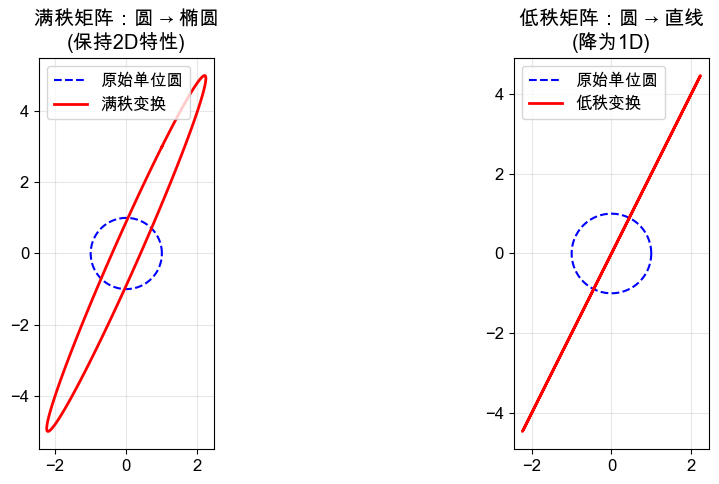


低秩近似（Low-Rank Approximation）

2. 什么是低秩近似？
低秩近似 = 用一个秩更小的矩阵来近似原始矩阵
目的：减少数据量，去除噪声，提取主要信息

步骤1: 创建真实的低秩数据
真实数据矩阵大小: (50, 40)
真实秩: 3

步骤2: 添加噪声
噪声水平: 0.2
信噪比: 8.96

步骤3: 对带噪声数据进行SVD
前10个奇异值: [60.24832204 43.53684266 27.34133353  2.54487336  2.23754909  2.20715363
  2.0734869   2.03331909  1.93908738  1.8883944 ]
真实信号应该只有前3个奇异值较大

步骤4: 尝试不同的秩近似
秩-1 近似:
  vs 真实数据误差: 51.6567
  vs 噪声数据误差: 52.0713
秩-3 近似:
  vs 真实数据误差: 3.1183
  vs 噪声数据误差: 8.2714
秩-10 近似:
  vs 真实数据误差: 6.4699
  vs 噪声数据误差: 6.0250


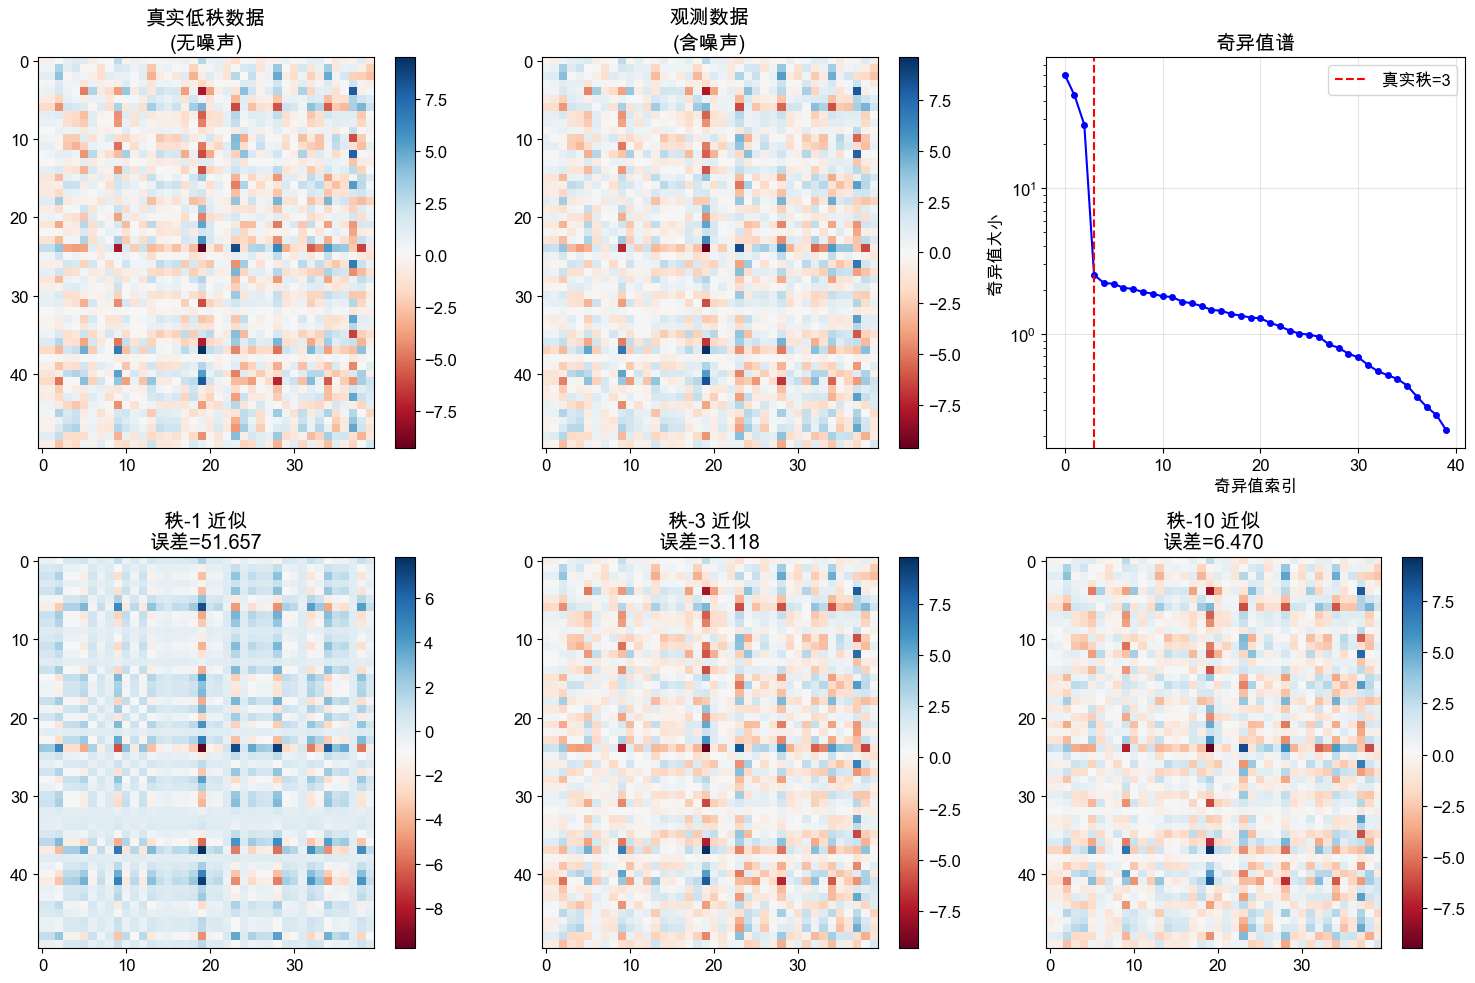


低秩近似的压缩效果

原始矩阵大小: 100 × 80 = 8000 个元素

不同秩近似的存储需求:
秩r | U矩阵 | 奇异值 | V^T矩阵 | 总计 | 压缩比
-------------------------------------------------------
 1   |  100  |    1   |    80   |  181 | 44.2x
 5   |  500  |    5   |   400   |  905 | 8.8x
10   | 1000  |   10   |   800   | 1810 | 4.4x
20   | 2000  |   20   |  1600   | 3620 | 2.2x
40   | 4000  |   40   |  3200   | 7240 | 1.1x


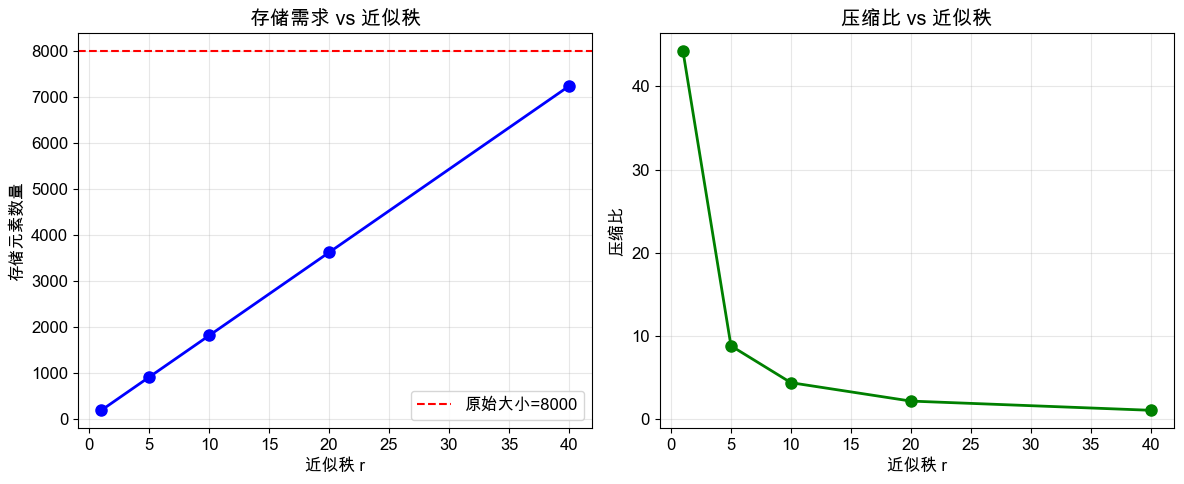


真实应用：图像压缩
图像大小: (60, 50)
原始数据量: 3000 像素

秩-1 压缩:
  压缩比: 27.0x
  均方误差: 0.069183
  能量保留: 79.9%

秩-5 压缩:
  压缩比: 5.4x
  均方误差: 0.007350
  能量保留: 97.9%

秩-20 压缩:
  压缩比: 1.4x
  均方误差: 0.002303
  能量保留: 99.3%


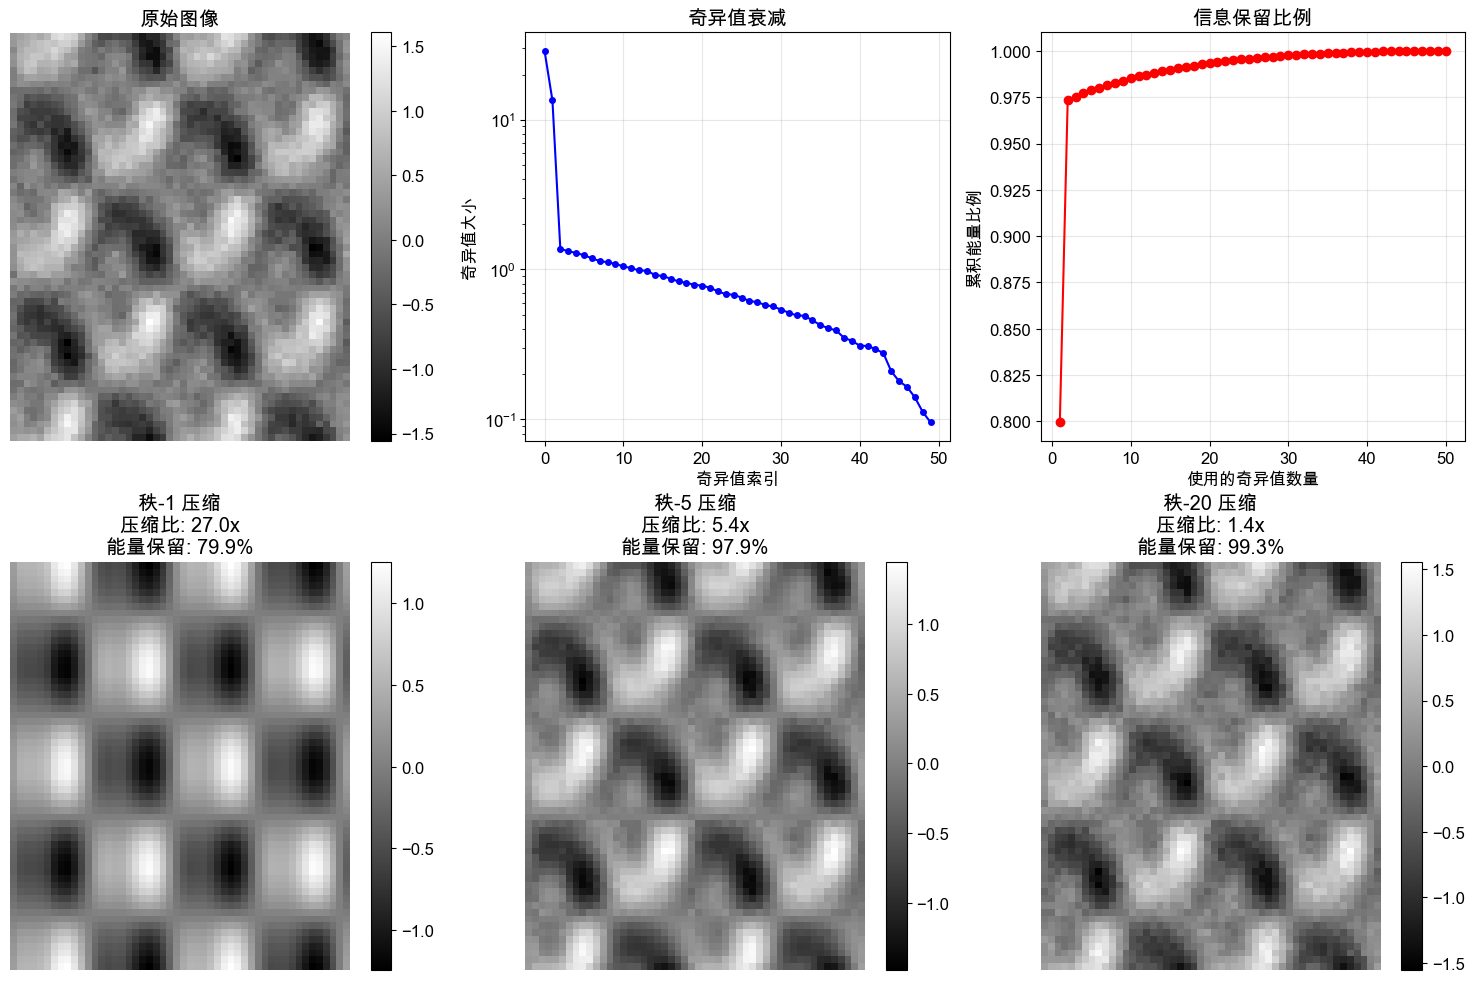


为什么SVD是最优的低秩近似？

3. SVD的最优性质：
• 对于任意矩阵A，SVD给出的秩-r近似是最优的
• 这意味着在所有秩为r的矩阵中，SVD重构的误差最小
• 这个结果被称为 Eckart-Young 定理

4. 直观解释：
• 奇异值按大小排序：σ₁ ≥ σ₂ ≥ ... ≥ σᵣ
• 大的奇异值对应'重要'的信息
• 小的奇异值对应'次要'的信息或噪声
• 保留前r个奇异值 = 保留最重要的信息


/opt/homebrew/anaconda3/envs/ml-dl-fullstack-guide/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 7522 (\N{LATIN SUBSCRIPT SMALL LETTER I}) missing from font(s) Arial Unicode MS.
  fig.canvas.print_figure(bytes_io, **kw)


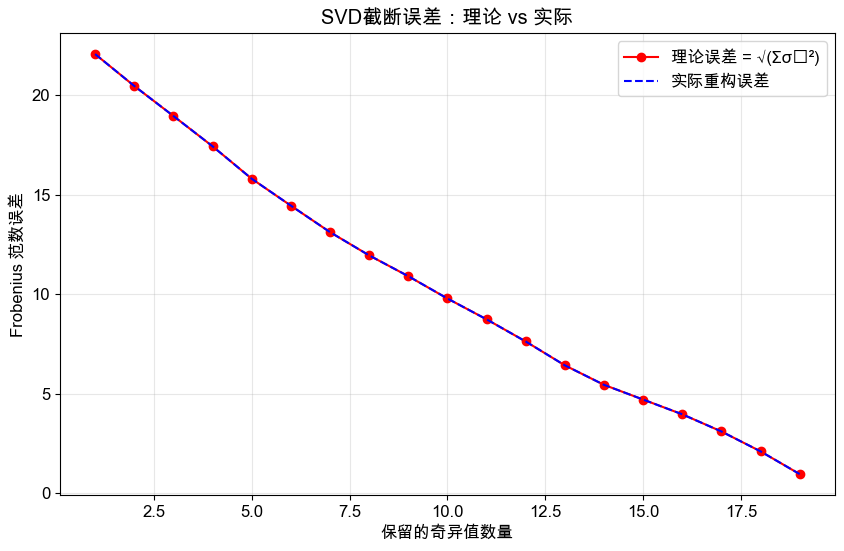


验证：理论和实际误差的最大差异 = 1.07e-14
（应该接近0，证明理论的正确性）

🎉 教程总结

关键要点:
1️⃣ 矩阵的秩 = 独立信息的数量
2️⃣ 低秩近似 = 用更简单的矩阵近似复杂矩阵
3️⃣ SVD自动按重要性排序信息（大奇异值 = 重要信息）
4️⃣ 截断SVD = 只保留最重要的信息，丢弃噪声
5️⃣ 应用：数据压缩、降噪、特征提取、推荐系统等

实际应用场景:
📱 图像/视频压缩
🔍 数据降维和可视化
🎵 音频信号处理
💡 推荐系统（Netflix、Amazon）
🧬 生物信息学（基因表达分析）
📊 金融数据分析


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams['font.family'] = 'Arial Unicode MS' 
plt.rcParams['font.size'] = 12

def explain_matrix_rank_concept():
    """解释矩阵秩的概念"""
    
    print("=" * 60)
    print("矩阵秩（Rank）的概念")
    print("=" * 60)
    
    print("\n1. 什么是矩阵的秩？")
    print("矩阵的秩 = 线性无关的行（或列）的最大数目")
    print("也就是说，秩告诉我们矩阵中有多少'独立信息'")
    
    # 示例1: 满秩矩阵
    A_full = np.array([[1, 2], 
                       [3, 4]])
    print(f"\n示例1 - 满秩矩阵:")
    print(f"A = \n{A_full}")
    print(f"矩阵大小: {A_full.shape}, 理论最大秩: {min(A_full.shape)}")
    
    U, s, VT = np.linalg.svd(A_full)
    rank_A = np.sum(s > 1e-10)  # 数值秩
    print(f"奇异值: {s}")
    print(f"实际秩: {rank_A} (所有奇异值都大于0)")
    
    # 示例2: 低秩矩阵
    A_low = np.array([[1, 2], 
                      [2, 4]])  # 第二行是第一行的2倍
    print(f"\n示例2 - 低秩矩阵:")
    print(f"A = \n{A_low}")
    print(f"矩阵大小: {A_low.shape}, 理论最大秩: {min(A_low.shape)}")
    
    U, s, VT = np.linalg.svd(A_low)
    rank_A = np.sum(s > 1e-10)
    print(f"奇异值: {s}")
    print(f"实际秩: {rank_A} (有一个奇异值接近0)")
    
    # 可视化
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # 满秩矩阵的变换效果
    theta = np.linspace(0, 2*np.pi, 100)
    unit_circle = np.array([np.cos(theta), np.sin(theta)])
    
    transformed_full = A_full @ unit_circle
    transformed_low = A_low @ unit_circle
    
    axes[0].plot(unit_circle[0], unit_circle[1], 'b--', label='原始单位圆')
    axes[0].plot(transformed_full[0], transformed_full[1], 'r-', linewidth=2, label='满秩变换')
    axes[0].set_aspect('equal')
    axes[0].set_title('满秩矩阵：圆 → 椭圆\n(保持2D特性)')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    axes[1].plot(unit_circle[0], unit_circle[1], 'b--', label='原始单位圆')
    axes[1].plot(transformed_low[0], transformed_low[1], 'r-', linewidth=2, label='低秩变换')
    axes[1].set_aspect('equal')
    axes[1].set_title('低秩矩阵：圆 → 直线\n(降为1D)')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def explain_low_rank_approximation():
    """解释低秩近似的原理"""
    
    print("\n" + "=" * 60)
    print("低秩近似（Low-Rank Approximation）")
    print("=" * 60)
    
    print("\n2. 什么是低秩近似？")
    print("低秩近似 = 用一个秩更小的矩阵来近似原始矩阵")
    print("目的：减少数据量，去除噪声，提取主要信息")
    
    # 创建一个真实的低秩矩阵加噪声的例子
    np.random.seed(42)
    
    # 步骤1: 创建真实的低秩结构
    print("\n步骤1: 创建真实的低秩数据")
    m, n = 50, 40
    true_rank = 3
    
    # 真实的低秩矩阵 = U_true @ V_true^T
    U_true = np.random.randn(m, true_rank)
    V_true = np.random.randn(n, true_rank)
    A_clean = U_true @ V_true.T
    
    print(f"真实数据矩阵大小: {A_clean.shape}")
    print(f"真实秩: {true_rank}")
    
    # 步骤2: 添加噪声
    print("\n步骤2: 添加噪声")
    noise_level = 0.2
    noise = noise_level * np.random.randn(m, n)
    A_noisy = A_clean + noise
    
    print(f"噪声水平: {noise_level}")
    print(f"信噪比: {np.linalg.norm(A_clean) / np.linalg.norm(noise):.2f}")
    
    # 步骤3: SVD分解
    print("\n步骤3: 对带噪声数据进行SVD")
    U, s, VT = np.linalg.svd(A_noisy, full_matrices=False)
    
    print(f"前10个奇异值: {s[:10]}")
    print(f"真实信号应该只有前{true_rank}个奇异值较大")
    
    # 步骤4: 不同秩的近似
    print("\n步骤4: 尝试不同的秩近似")
    
    ranks_to_try = [1, 2, 3, 5, 10]
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    # 原始数据可视化
    im0 = axes[0, 0].imshow(A_clean, cmap='RdBu', aspect='auto')
    axes[0, 0].set_title('真实低秩数据\n(无噪声)')
    plt.colorbar(im0, ax=axes[0, 0])
    
    im1 = axes[0, 1].imshow(A_noisy, cmap='RdBu', aspect='auto')
    axes[0, 1].set_title('观测数据\n(含噪声)')
    plt.colorbar(im1, ax=axes[0, 1])
    
    # 奇异值谱
    axes[0, 2].semilogy(s, 'bo-', markersize=4)
    axes[0, 2].axvline(true_rank, color='red', linestyle='--', 
                      label=f'真实秩={true_rank}')
    axes[0, 2].set_xlabel('奇异值索引')
    axes[0, 2].set_ylabel('奇异值大小')
    axes[0, 2].set_title('奇异值谱')
    axes[0, 2].legend()
    axes[0, 2].grid(True, alpha=0.3)
    
    # 不同秩的重构结果
    reconstruction_errors = []
    
    for i, rank in enumerate([1, 3, 10]):
        # 低秩近似: 只保留前rank个奇异值
        A_approx = U[:, :rank] @ np.diag(s[:rank]) @ VT[:rank, :]
        
        # 计算重构误差
        error_vs_clean = np.linalg.norm(A_clean - A_approx, 'fro')
        error_vs_noisy = np.linalg.norm(A_noisy - A_approx, 'fro')
        
        reconstruction_errors.append({
            'rank': rank,
            'error_vs_clean': error_vs_clean,
            'error_vs_noisy': error_vs_noisy
        })
        
        # 可视化
        im = axes[1, i].imshow(A_approx, cmap='RdBu', aspect='auto')
        axes[1, i].set_title(f'秩-{rank} 近似\n误差={error_vs_clean:.3f}')
        plt.colorbar(im, ax=axes[1, i])
        
        print(f"秩-{rank} 近似:")
        print(f"  vs 真实数据误差: {error_vs_clean:.4f}")
        print(f"  vs 噪声数据误差: {error_vs_noisy:.4f}")
    
    plt.tight_layout()
    plt.show()
    
    return A_clean, A_noisy, U, s, VT, reconstruction_errors

def demonstrate_compression_effect():
    """演示压缩效果"""
    
    print("\n" + "=" * 60)
    print("低秩近似的压缩效果")
    print("=" * 60)
    
    # 原始矩阵大小
    m, n = 100, 80
    original_elements = m * n
    
    print(f"\n原始矩阵大小: {m} × {n} = {original_elements} 个元素")
    
    # 不同秩近似所需的存储空间
    ranks = [1, 5, 10, 20, 40]
    
    print("\n不同秩近似的存储需求:")
    print("秩r | U矩阵 | 奇异值 | V^T矩阵 | 总计 | 压缩比")
    print("-" * 55)
    
    for r in ranks:
        u_elements = m * r  # U矩阵: m×r
        s_elements = r      # 奇异值: r个
        vt_elements = r * n # V^T矩阵: r×n
        total_elements = u_elements + s_elements + vt_elements
        compression_ratio = original_elements / total_elements
        
        print(f"{r:2d}   | {u_elements:4d}  |   {s_elements:2d}   |  {vt_elements:4d}   | {total_elements:4d} | {compression_ratio:.1f}x")
    
    # 可视化压缩比
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # 存储需求
    total_storage = [m*r + r + r*n for r in ranks]
    axes[0].plot(ranks, total_storage, 'bo-', linewidth=2, markersize=8)
    axes[0].axhline(original_elements, color='red', linestyle='--', 
                   label=f'原始大小={original_elements}')
    axes[0].set_xlabel('近似秩 r')
    axes[0].set_ylabel('存储元素数量')
    axes[0].set_title('存储需求 vs 近似秩')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # 压缩比
    compression_ratios = [original_elements / storage for storage in total_storage]
    axes[1].plot(ranks, compression_ratios, 'go-', linewidth=2, markersize=8)
    axes[1].set_xlabel('近似秩 r')
    axes[1].set_ylabel('压缩比')
    axes[1].set_title('压缩比 vs 近似秩')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def real_world_example_image_compression():
    """真实世界例子：图像压缩"""
    
    print("\n" + "=" * 60)
    print("真实应用：图像压缩")
    print("=" * 60)
    
    # 创建一个简单的"图像"（实际上是一个有结构的矩阵）
    np.random.seed(42)
    
    # 创建一个有结构的图像模拟
    x = np.linspace(0, 4*np.pi, 50)
    y = np.linspace(0, 4*np.pi, 60)
    X, Y = np.meshgrid(x, y)
    
    # 组合几个简单的模式
    image = (np.sin(X) * np.cos(Y) + 
             0.5 * np.sin(2*X) * np.sin(2*Y) + 
             0.3 * np.cos(3*X) * np.cos(Y))
    
    # 添加少量噪声
    image += 0.1 * np.random.randn(*image.shape)
    
    print(f"图像大小: {image.shape}")
    print(f"原始数据量: {image.size} 像素")
    
    # SVD分解
    U, s, VT = np.linalg.svd(image, full_matrices=False)
    
    # 不同压缩级别
    compression_ranks = [1, 3, 5, 10, 20]
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    # 原始图像
    im0 = axes[0, 0].imshow(image, cmap='gray')
    axes[0, 0].set_title('原始图像')
    axes[0, 0].axis('off')
    plt.colorbar(im0, ax=axes[0, 0])
    
    # 奇异值
    axes[0, 1].semilogy(s, 'bo-', markersize=4)
    axes[0, 1].set_xlabel('奇异值索引')
    axes[0, 1].set_ylabel('奇异值大小')
    axes[0, 1].set_title('奇异值衰减')
    axes[0, 1].grid(True, alpha=0.3)
    
    # 累积能量
    cumulative_energy = np.cumsum(s**2) / np.sum(s**2)
    axes[0, 2].plot(range(1, len(cumulative_energy)+1), cumulative_energy, 'ro-')
    axes[0, 2].set_xlabel('使用的奇异值数量')
    axes[0, 2].set_ylabel('累积能量比例')
    axes[0, 2].set_title('信息保留比例')
    axes[0, 2].grid(True, alpha=0.3)
    
    # 不同压缩级别的结果
    for i, rank in enumerate([1, 5, 20]):
        # 重构图像
        image_compressed = U[:, :rank] @ np.diag(s[:rank]) @ VT[:rank, :]
        
        # 计算压缩比和误差
        compression_ratio = image.size / (U.shape[0]*rank + rank + VT.shape[1]*rank)
        mse = np.mean((image - image_compressed)**2)
        energy_retained = np.sum(s[:rank]**2) / np.sum(s**2)
        
        # 显示
        im = axes[1, i].imshow(image_compressed, cmap='gray')
        axes[1, i].set_title(f'秩-{rank} 压缩\n压缩比: {compression_ratio:.1f}x\n能量保留: {energy_retained:.1%}')
        axes[1, i].axis('off')
        plt.colorbar(im, ax=axes[1, i])
        
        print(f"\n秩-{rank} 压缩:")
        print(f"  压缩比: {compression_ratio:.1f}x")
        print(f"  均方误差: {mse:.6f}")
        print(f"  能量保留: {energy_retained:.1%}")
    
    plt.tight_layout()
    plt.show()

def why_svd_works_for_approximation():
    """解释为什么SVD适合做低秩近似"""
    
    print("\n" + "=" * 60)
    print("为什么SVD是最优的低秩近似？")
    print("=" * 60)
    
    print("\n3. SVD的最优性质：")
    print("• 对于任意矩阵A，SVD给出的秩-r近似是最优的")
    print("• 这意味着在所有秩为r的矩阵中，SVD重构的误差最小")
    print("• 这个结果被称为 Eckart-Young 定理")
    
    # 数学证明的直观解释
    print("\n4. 直观解释：")
    print("• 奇异值按大小排序：σ₁ ≥ σ₂ ≥ ... ≥ σᵣ")
    print("• 大的奇异值对应'重要'的信息")
    print("• 小的奇异值对应'次要'的信息或噪声")
    print("• 保留前r个奇异值 = 保留最重要的信息")
    
    # 演示不同近似的误差
    np.random.seed(42)
    A = np.random.randn(30, 20)
    U, s, VT = np.linalg.svd(A, full_matrices=False)
    
    # 计算截断误差（理论值）
    ranks = range(1, min(A.shape))
    theoretical_errors = [np.sqrt(np.sum(s[r:]**2)) for r in ranks]
    
    # 验证实际误差
    actual_errors = []
    for r in ranks:
        A_approx = U[:, :r] @ np.diag(s[:r]) @ VT[:r, :]
        error = np.linalg.norm(A - A_approx, 'fro')
        actual_errors.append(error)
    
    # 可视化
    plt.figure(figsize=(10, 6))
    plt.plot(ranks, theoretical_errors, 'ro-', label='理论误差 = √(Σσᵢ²)')
    plt.plot(ranks, actual_errors, 'b--', label='实际重构误差')
    plt.xlabel('保留的奇异值数量')
    plt.ylabel('Frobenius 范数误差')
    plt.title('SVD截断误差：理论 vs 实际')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    print(f"\n验证：理论和实际误差的最大差异 = {np.max(np.abs(np.array(theoretical_errors) - np.array(actual_errors))):.2e}")
    print("（应该接近0，证明理论的正确性）")

def main_tutorial():
    """完整的教程"""
    
    print("🎯 SVD低秩近似完整教程")
    print("=" * 60)
    
    # 1. 基本概念
    explain_matrix_rank_concept()
    
    # 2. 低秩近似原理
    A_clean, A_noisy, U, s, VT, errors = explain_low_rank_approximation()
    
    # 3. 压缩效果
    demonstrate_compression_effect()
    
    # 4. 实际应用
    real_world_example_image_compression()
    
    # 5. 理论基础
    why_svd_works_for_approximation()
    
    print("\n" + "=" * 60)
    print("🎉 教程总结")
    print("=" * 60)
    print("\n关键要点:")
    print("1️⃣ 矩阵的秩 = 独立信息的数量")
    print("2️⃣ 低秩近似 = 用更简单的矩阵近似复杂矩阵")
    print("3️⃣ SVD自动按重要性排序信息（大奇异值 = 重要信息）")
    print("4️⃣ 截断SVD = 只保留最重要的信息，丢弃噪声")
    print("5️⃣ 应用：数据压缩、降噪、特征提取、推荐系统等")
    
    print("\n实际应用场景:")
    print("📱 图像/视频压缩")
    print("🔍 数据降维和可视化") 
    print("🎵 音频信号处理")
    print("💡 推荐系统（Netflix、Amazon）")
    print("🧬 生物信息学（基因表达分析）")
    print("📊 金融数据分析")

if __name__ == "__main__":
    main_tutorial()

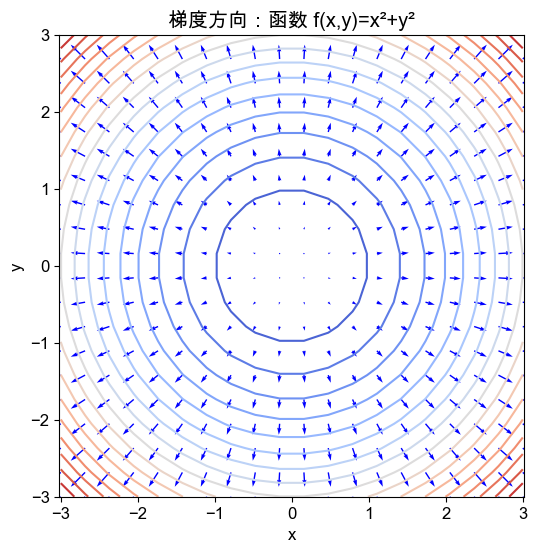

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams['font.family'] = 'Arial Unicode MS' 
plt.rcParams['font.size'] = 12

# 定义函数和梯度
def f(x, y):
    return x**2 + y**2  # 简单的凸函数

def grad_f(x, y):
    return np.array([2*x, 2*y])  # 梯度

# 网格
x = np.linspace(-3, 3, 20)
y = np.linspace(-3, 3, 20)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# 计算梯度
U, V = grad_f(X, Y)

plt.figure(figsize=(6,6))
plt.contour(X, Y, Z, levels=20, cmap='coolwarm')  # 等高线
plt.quiver(X, Y, U, V, color='blue')  # 梯度方向
plt.title("梯度方向：函数 f(x,y)=x²+y²")
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')
plt.show()
